# Static Graphics - Overview

This lab explores the capabilities behind the pandas .loc method a little further, provides a superficial overview of spatial joins, explores data aggregation and most of all, fully introduces you to making static graphs and maps in Python.

# Premise

Your work continues in Montreal... Your team wants to see some preliminary results! A graph or two or, better yet, a map!



# Setting up

To do this lab, you will need to import your population geodata for Montreal, which you prepared in a previous lab. You can do this in several ways, for example:

## Option 1: export as spatial data file and import

Using geopandas, export your gdf from that lab as a .geojson (`gdf.to_file('FILENAME.geojson', driver='GeoJSON')`) and import it into this notebook.

## Option 2: re-merge from the raw datafiles

Import your census table and DA boundaries and merge them again in this notebook

If your workspace hasn't been setup to easily switch between labs and you're having trouble accessing the previous lab, or if you haven't completed the data processing portion of it, then redoing the key merge steps shouldn't require too much time. You would:
- Import your census data
- Import the spatial DA boundary file
- Merge based on their common ID

Remember that this is code, so if you completed these steps in the previous lab, you could just copy-paste your old code into this notebook and rerun it for the same results...

---

To continue, you should have a geodataframe combining the population from the most recent published census containing fields for overall population, low-income population and then a breakdown of that low-income population by age group.

In [1]:
import pandas as pd
import geopandas as gpd
from glob import glob

#FYI this lab also imports missingno at a later point

In [2]:
#an exmple of importing this data from geojson:
gjsonFiles = glob('*.geojson')
gdf_da = gpd.read_file(gjsonFiles[2])
gdf_da.columns
#inspect you gdf and make sure everything looks as expected

Index(['DAUID', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME', 'CDTYPE', 'CCSUID',
       'CCSNAME', 'CSDUID', 'CSDNAME', 'CSDTYPE', 'ERUID', 'ERNAME', 'SACCODE',
       'SACTYPE', 'CMAUID', 'CMAPUID', 'CMANAME', 'CMATYPE', 'CTUID', 'CTNAME',
       'ADAUID', 'GEOUID', 'pop16', 'TotalLowIncome', 'LowIncome0-17',
       'LowIncome18-64', 'LowIncome65over', 'Percentage', 'geometry'],
      dtype='object')

You should have a field where you calculated the proportion of residents classified as 'low income' from a previous lab. If you do not have this field, make sure calculate it. Your gdf should also be projected in MTM 8.

Let's inspect the data a little more:

In [3]:
#the following is a more convoluted way of using .describe() on a dataframe,
#note however that summary stats can be retrieved for specific columns by calling specific methods such as mean(), etc.
print(
    "mean: ", gdf_da['Percentage'].mean()
    ,"max: ", gdf_da['Percentage'].max()
    ,"min: ", gdf_da['Percentage'].min()
)

mean:  20.554676591213884 max:  79.54545454545455 min:  0.0


The dissemination area with the highest proportion of low-income residents on the Island of Montreal would appear to be one with nearly 80% of its population considered to be low income.

Below, We can see how these proportions are distributed: the 75% percentile indicates around 27 % of residents as low income when viewing the table below.

In [4]:
gdf_da.describe()

,DAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,Percentage
count,3.202000e+03,3.202000e+03,3202.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2.466173e+07,2.466173e+07,606.509681,127.525332,25.655478,82.878404,19.081697,20.554677
std,1.000295e+03,1.000295e+03,300.539345,102.855394,26.304383,73.725224,22.477504,11.801169
min,2.466000e+07,2.466000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.466087e+07,2.466087e+07,458.000000,60.000000,10.000000,40.000000,10.000000,12.000000
50%,2.466175e+07,2.466175e+07,546.000000,105.000000,20.000000,65.000000,15.000000,19.075883
75%,2.466261e+07,2.466261e+07,663.000000,165.000000,35.000000,105.000000,20.000000,27.249286
max,2.466345e+07,2.466345e+07,4746.000000,1530.000000,315.000000,1110.000000,255.000000,79.545455


So the 80% case might be a distant outlier. Are there any others with such high concentrations of low income residents?

The code cells below present two common ways of filtering data with pandas:

In [5]:
#you can subset directly by using boolean logic, without the loc method
gdf_da[gdf_da['Percentage'] > 75]

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CTNAME,ADAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,Percentage,geometry
303,24661263,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0060.00,24660124,24661263,264.0,210.0,25.0,75.0,110.0,79.545455,"POLYGON ((299950.562 5041467.399, 299908.675 5..."
881,24661111,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0068.00,24660158,24661111,576.0,450.0,175.0,260.0,10.0,78.125000,"POLYGON ((299266.765 5038962.555, 299212.360 5..."


In [6]:
#you will see this method used often on the web, but the better way (faster processing time, and less error-prone) is to use .loc as instructed in a previous lab
gdf_da.loc[gdf_da['Percentage'] > 75]

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,CTNAME,ADAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,Percentage,geometry
303,24661263,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0060.00,24660124,24661263,264.0,210.0,25.0,75.0,110.0,79.545455,"POLYGON ((299950.562 5041467.399, 299908.675 5..."
881,24661111,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,0068.00,24660158,24661111,576.0,450.0,175.0,260.0,10.0,78.125000,"POLYGON ((299266.765 5038962.555, 299212.360 5..."


There are few DAs (2) with such high concentrations...

What is happening exactly with the methods above? You are essentially using a logical test (*x > 0.75*) on a pandas Series (`gdf_da['percLowInc']`), the result of which is a Series of booleans as seen below in more detail:

In [7]:
#simply running the following provides you with a pandas Series of booleans, where those few that are True are those greater than 0.75
gdf_da['Percentage'] > 75

0       False
1       False
2       False
3       False
4       False
        ...  
3197    False
3198    False
3199    False
3200    False
3201    False
Name: Percentage, Length: 3202, dtype: bool

This Series of booleans is passed to the .loc method like a mask or filter, only letting through the rows of your dataframe that are True, as you already saw above.

If you wanted to just output a single column from your filtered dataframe instead of the whole rows, then you could do so. The following outputs the filtered values of 'percLowInc' as a Series.

In [8]:
gdf_da.loc[gdf_da['Percentage'] > 75, 'Percentage']

303    79.545455
881    78.125000
Name: Percentage, dtype: float64

What if you wanted to modify values based values found in another column? This is a common task you will find yourself doing when wrangling data. For example, lets label the upper quartile of low-income DAs as 'top 25% low inc' in a new column (this is basically a useless thing to do, but it demonstrates what we're talking about here!).

In [9]:
gdf_da.loc[gdf_da['Percentage'] >= gdf_da['Percentage'].quantile(0.75), 'newcol'] = 'top 25% low inc'
gdf_da

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,ADAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,Percentage,geometry,newcol
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660213,24661006,301.0,60.0,10.0,40.0,10.0,19.933555,"POLYGON ((297259.421 5034863.019, 297332.871 5...",NaN
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660213,24661007,510.0,100.0,25.0,60.0,15.0,19.607843,"POLYGON ((297168.294 5034498.663, 297102.438 5...",NaN
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660213,24661008,388.0,125.0,40.0,85.0,5.0,32.216495,"POLYGON ((296958.096 5034787.267, 297022.348 5...",top 25% low inc
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660213,24661009,624.0,130.0,20.0,80.0,35.0,20.833333,"POLYGON ((296963.288 5034447.042, 296889.494 5...",NaN
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660213,24661010,605.0,110.0,15.0,70.0,25.0,18.181818,"POLYGON ((296741.421 5034392.515, 296667.522 5...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,24662574,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660078,24662574,523.0,65.0,10.0,40.0,15.0,12.428298,"POLYGON ((292164.905 5046647.761, 292149.491 5...",NaN
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660078,24662575,524.0,115.0,20.0,80.0,10.0,21.946565,"POLYGON ((292307.532 5046994.963, 292274.121 5...",NaN
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660078,24662576,521.0,140.0,40.0,90.0,10.0,26.871401,"POLYGON ((292227.693 5046796.605, 292211.632 5...",NaN
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,24660078,24662577,614.0,115.0,15.0,95.0,5.0,18.729642,"POLYGON ((292548.328 5046895.612, 292512.931 5...",NaN


1. 📝 (1 point) What's going on in the above command? Can you describe what the command is doing? How has our dataframe been modified?

**This command is adding another column to the dataframe called "newcol" and adding in the text "top 25% low inc" for each row where the value in the low income percentage column falls in the top 75th quantile. **

# Basic plotting



The command below is a great help in Jupyter, since it makes plots render automatically without needing to assign them to variables or use the .show() method ...

In [10]:
%matplotlib inline

Like geopandas and basic maps, pandas itself can actually draw basic plots, it relies on the matplotlib dependancy here, but can be called as a pandas DataFrame or Series method:

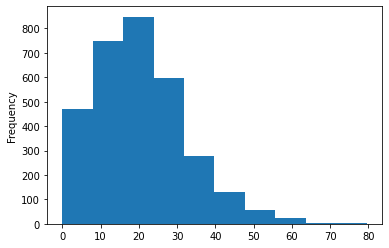

In [11]:
#tip: you can view the available arguments/parameters for a method by holding SHIFT+TAB while typing it out
gdf_da['Percentage'].plot(kind='hist');

This is a shortcut, but it forecloses several options we have available. Let's import the viz package directly so we have direct access to its methods.

In [12]:
import matplotlib
#import matplotlib.pyplot as plt

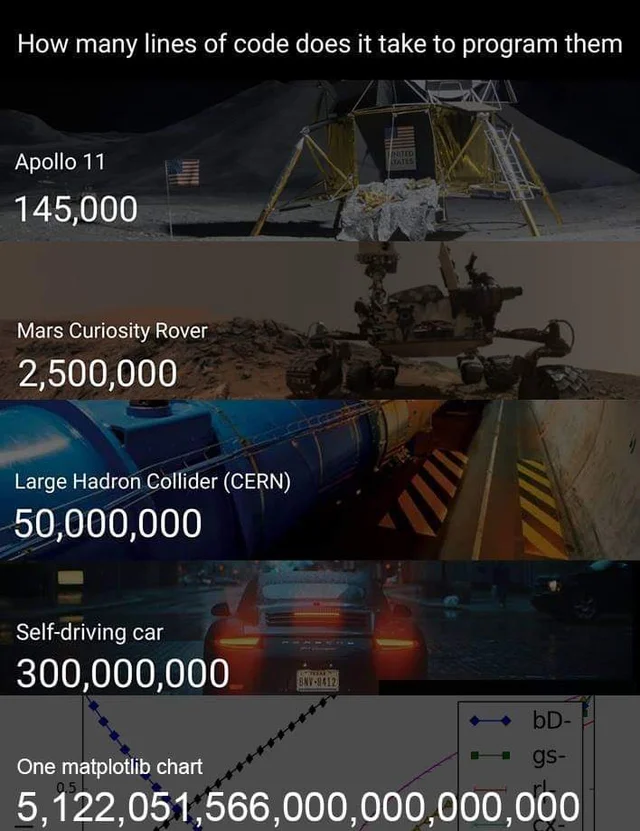

Source: [Reddit](https://www.reddit.com/r/ProgrammerHumor/comments/ai23ah/thats_true_you_know/)

There are many ways of declaring plots and modifying plots using matplotlib, or by using its more user-friendly module called pyplot (often *imported as plt*). Because of such flexibility, things can get complicated quickly. It's best to start using matplotlib in the most *verbose* and *explicit* way possible. This means more lines of code, but it also means that you're more likely to understand what's happening, you're better equipped at parsing through matplotlib documentation, and you can avoid errors and misunderstandings down the line...

Below, we will declare an empty plot with a given size. Notice that **the plot is made up of 2 components**.

Notice as well that we are using pyplot module in the most verbose way possible. Normally, people just `import matplotlib.pyplot as plt` and use `plt.METHOD`, but below is just to remind you that this is all just matplotlib.

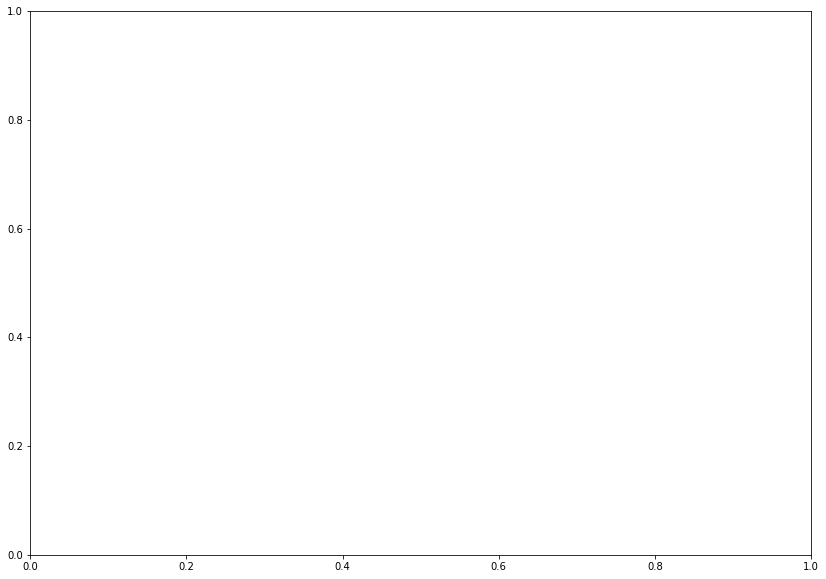

In [13]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))

We created two variables, fig and ax. Remember, these are arbitrary names, but a standard nevertheless.

Note also that we are unpacking a tuple in the above code. This is something that can be done in Python. Since the subplots method produces a tuple, you can preemptively assign that tuple's components to new variables. This is what's happening above, where we assign the [0] of the tuple to fig and the [1] to ax.

These two variables now hold the two core objects used for all types of plotting operations. First object fig, short for figure, imagine it as the frame of your plot. You can resize, reshape the frame but you cannot draw on it.

Each figure can have multiple subplots. Here, subplot is synonymous with axes. The second object, ax, short for axes, is the canvas you draw on.

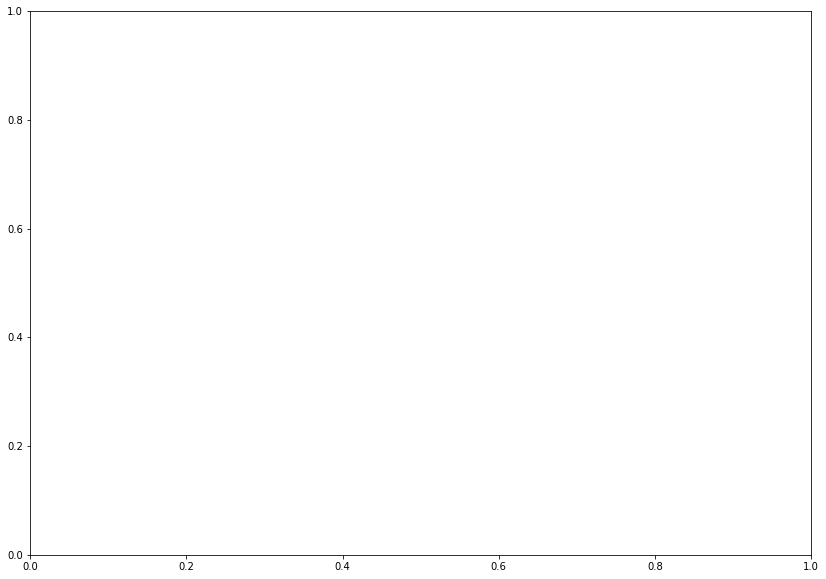

In [14]:
#if you run fig alone, notice what it is
fig

In [15]:
#the axes object called ax relies on the fig for display
ax

<AxesSubplot:>

The [subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) method is an elaboration of the [plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. Using the plot method is fine, but it limits the amount of axes that you can have in your figure to 1. You can easily settle on always using .subplots() for greater flexibility. Don't let its name confuse you!

If you used subplots() to its full capacity, though, you would be creating multiple plots within one figure. The following will create a figure containing 4 plots (4 distinct axes objects). In the subplots method, you declare a figure with 2 columns and 2 rows, and you unpack the result..

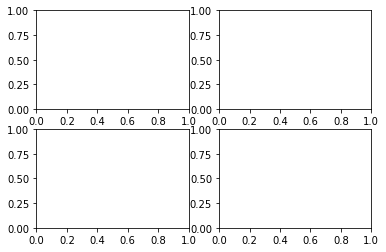

In [16]:
fig1, ((ax1, ax2), (ax3, ax4)) = matplotlib.pyplot.subplots(2, 2)
#with subplots, you can add data to each ax object, you can have them share axes for visual harmony, etc.

From here on, let's refer to our initial fig and ax...

Let's add data to your ax. Basically all [plt](https://matplotlib.org/stable/api/pyplot_summary.html) methods are also available under the [matplotlib.axes.Axes](https://matplotlib.org/stable/api/axes_api.html) object. This means that your axes object (which you called *ax*) has many methods you can use. Below, let's recreate what we already did with pandas earlier.

(array([471., 750., 848., 595., 276., 131.,  57.,  23.,   4.,   3.]),
 array([ 0.        ,  7.95454545, 15.90909091, 23.86363636, 31.81818182,
        39.77272727, 47.72727273, 55.68181818, 63.63636364, 71.59090909,
        79.54545455]),
 <BarContainer object of 10 artists>)

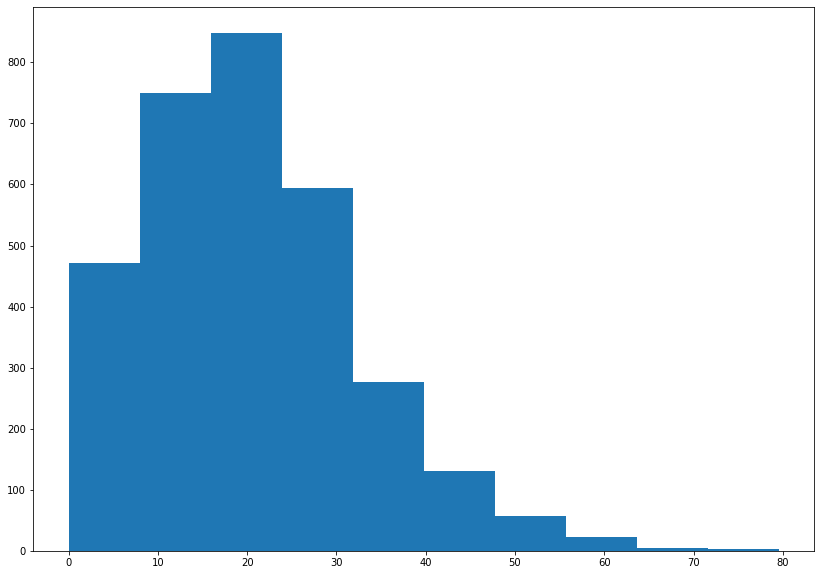

In [17]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
ax.hist(gdf_da['Percentage'])

Plotting geographic data utilizes the same fundamental matplotlib objects (figure, axes). A simple way to plot a geodataframe is to use the [geodataframe.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) method, which utilizes the geometry attributes without you needing to specify them. You can specify which axes object to refer it to as one of its arguments as seen below (i.e. you pass the axes object called ax to the ax argument in plot()).

Note that you should re-declare the fig and ax, since you shouldn't be trying to plot a map of Montreal onto the bar chart you did above...

<AxesSubplot:>

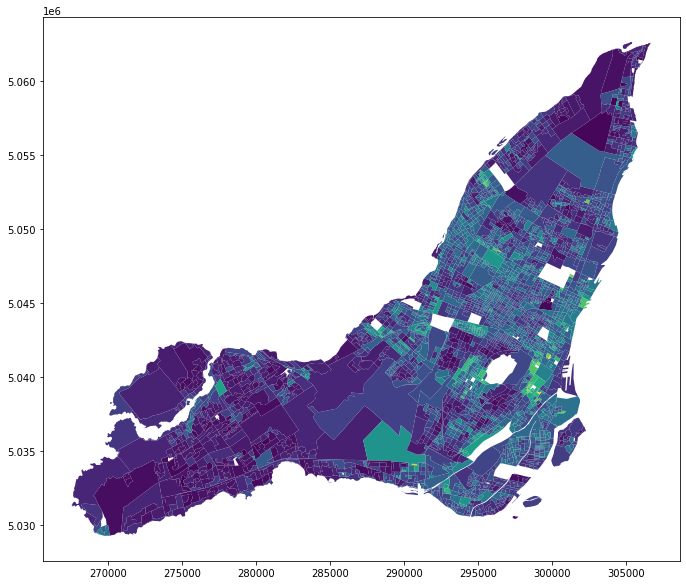

In [18]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
gdf_da.plot(column = 'Percentage', ax = ax)

We can modify the map bounds by using one of the many methods contained in our Axes object, in this case: *set_xlim/ylim*.

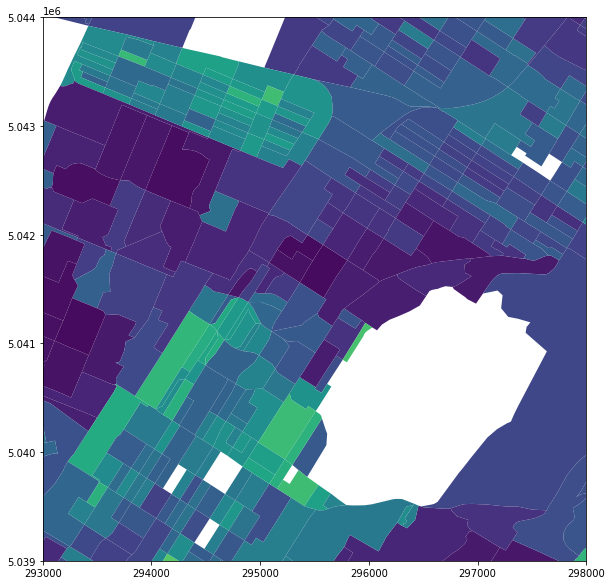

In [19]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
gdf_da.plot(column = 'Percentage', ax = ax)

ax.set_xlim(293000, 298000)
ax.set_ylim(5039000, 5044000);

2. 📝 (1 point) How do you interpret the axis tick numbers above? Could this have something to do with how your geodata were projected? Are these any different from axis numbers that appear on a more conventional (non-spatial) plot?

**The axis numbers above are changing the dimensions of the presented map. Setting the limits of the map to a smaller will then present the points that within these limits.**

Let's overlay some other info which could help us contextualize and explore this information more effectively.

- Head to [this page](https://donnees.montreal.ca/ville-de-montreal/polygones-arrondissements#resource-limite_administrative_de_l'agglom%C3%A9ration_de_montr%C3%A9al) and download the geographic boundary files for political divisions of the island of Montreal. Download the geojson file provided
  - If this opens a new tab, simply right-click and download/save as onto your machine.
  - Be sure to save the file as *.geojson*
  - Save this file in your workspace so that you can easily import it here!



In [20]:
filename = glob('limadmin.geojson')[0]
gdf_muni = gpd.read_file(filename)

3. 📝 (1 point) In one line of code, project *gdf_muni* in the same projection as *gdf_da*. Recall that a geodataframe's CRS info can be accessed via *geodataframe.crs*...

In [21]:
gdf_muni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
gdf_da.crs

<Projected CRS: EPSG:2950>
Name: NAD83(CSRS) / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
gdf_muni = gdf_muni.to_crs('EPSG:2950')

Let's plot these layers!

<AxesSubplot:>

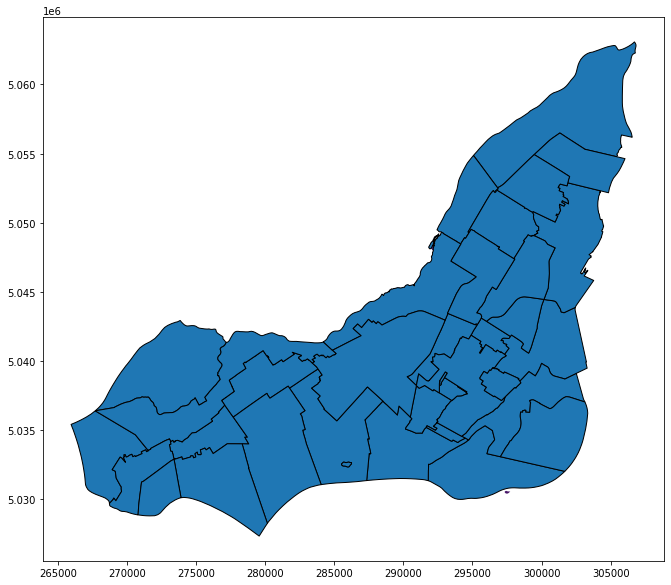

In [24]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
gdf_da.plot(column = 'Percentage', ax = ax)
gdf_muni.plot(ax = ax, edgecolor="#000")

Notice how we simply plotted our second gdf on top of the other by pointing it to the same ax object. We also gave it some darker edges...

An interesting way to understand our population better might be to be able to segment it by political subdivision. That way we could begin to better articulate where low income populations are geographically concentrated.
A good way to do this might be to attach the territory name to each DA unit. To do this, we should do a [*spatial join*](http://wiki.gis.com/wiki/index.php/Spatial_Join) by using the geopandas [sjoin](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html) method.

In [25]:
gdf_sjoined = gdf_da.sjoin(gdf_muni, how='left')
gdf_sjoined

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,index_right,NOM,TYPE,CODEID,ABREV,NUM,CODEMAMROT,AIRE,MUNID,PERIM
0,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,6,Le Sud-Ouest,Arrondissement,63,SO,21,REM20,1.814427e+07,66023,29633.161330
1,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,6,Le Sud-Ouest,Arrondissement,63,SO,21,REM20,1.814427e+07,66023,29633.161330
2,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,6,Le Sud-Ouest,Arrondissement,63,SO,21,REM20,1.814427e+07,66023,29633.161330
3,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,6,Le Sud-Ouest,Arrondissement,63,SO,21,REM20,1.814427e+07,66023,29633.161330
4,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,6,Le Sud-Ouest,Arrondissement,63,SO,21,REM20,1.814427e+07,66023,29633.161330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,24662574,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,15,Ahuntsic-Cartierville,Arrondissement,4,AC,24,REM23,2.557119e+07,66023,37790.097234
3198,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,15,Ahuntsic-Cartierville,Arrondissement,4,AC,24,REM23,2.557119e+07,66023,37790.097234
3199,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,15,Ahuntsic-Cartierville,Arrondissement,4,AC,24,REM23,2.557119e+07,66023,37790.097234
3200,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,15,Ahuntsic-Cartierville,Arrondissement,4,AC,24,REM23,2.557119e+07,66023,37790.097234


Note that you might encounter an error when using the sjoin method. If so, then install the missing package(s) and restart Jupyter Lab.

Let's try using the [*missingno*](https://github.com/ResidentMario/missingno#readme) package to check the quality of our spatial join. missingno uses [seaborn](https://seaborn.pydata.org/index.html) (a higher-level plotting package that simplifies a lot of matplotlib's functionality) to create nice graphs to help us *see* our data better. It emphasizes missing values, and could be useful in some cases. This package could be useful for some who prefer to have more of an Excel-style view on their dataset when checking for missing data/data quality.

<AxesSubplot:>

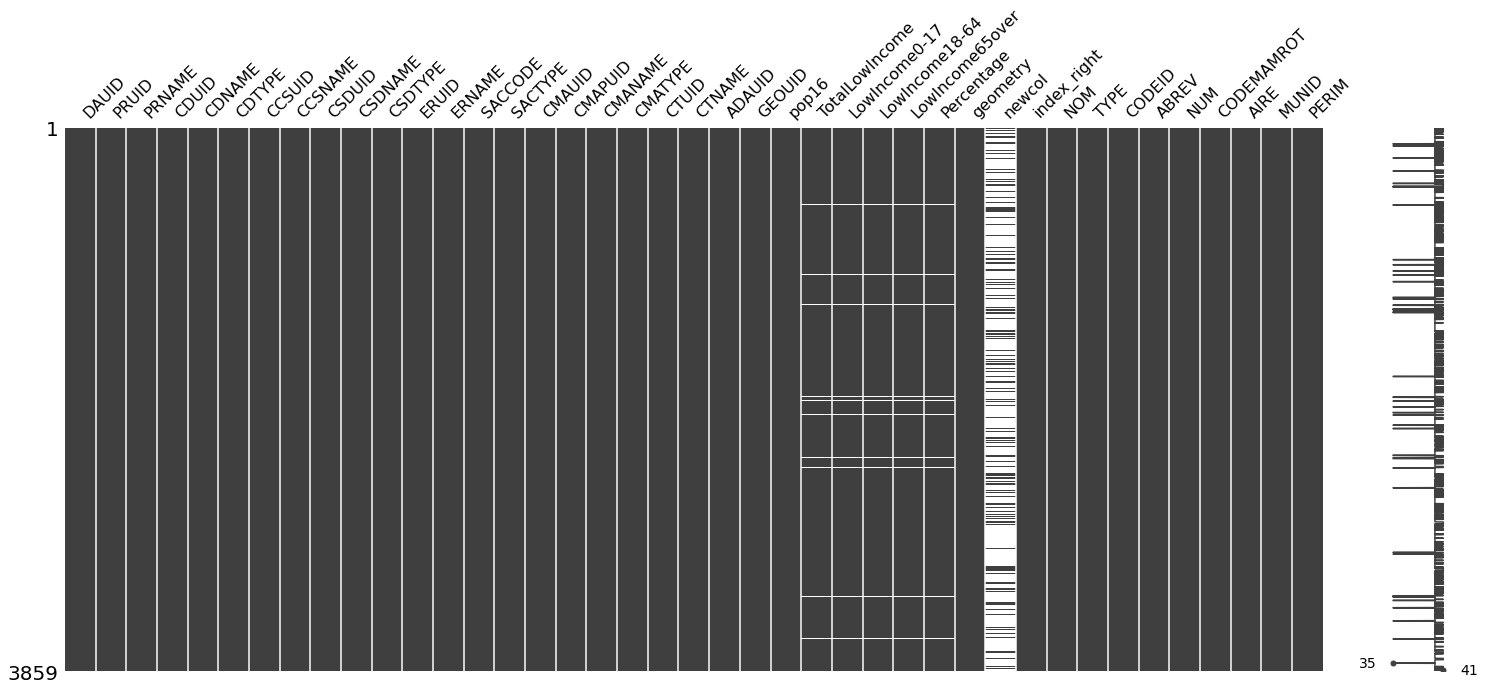

In [26]:
import missingno as msno

msno.matrix(gdf_sjoined)

While some of our Census data related to low income age groups seem to be missing values, all our DAs now seem to have either an appended municipality or borough name, which is great. This is expected, since we saw on our map that all features in both datasets completely overlap. Things would be different if the coverage of one dataset differed from that of the other. Luckily this was not the case here.

4. 📝 (1 point) Plot the DAs to which you just joined territory information in a mapview. This time, instead of displaying low-income population in your choropleth, plot your DAs by territory name. On top of this layer, plot the original municipal boundary file for comparison (you can set its transparency using the *alpha* keyword argument).

Note that you are not being asked to make a final map here, you are just being asked to plot data in the spirit of exploratory data visualization. Your output should allow you to clearly see whether your spatial join worked as expected.

<AxesSubplot:>

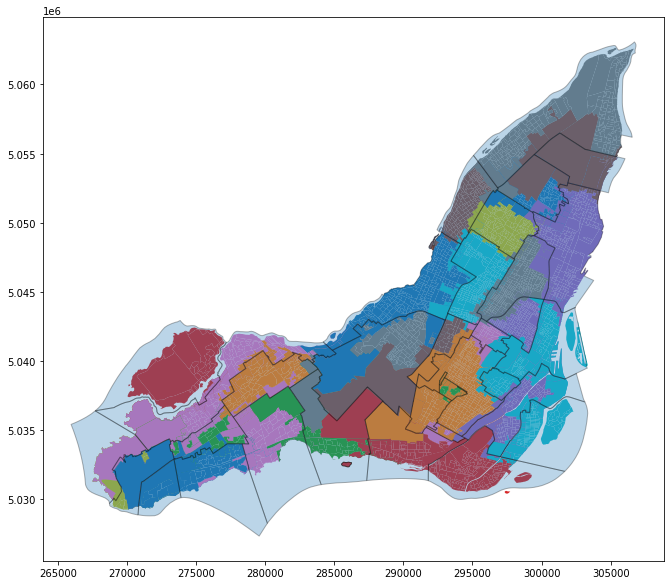

In [27]:
fig, ax = matplotlib.pyplot.subplots(figsize=(14, 10))
gdf_sjoined.plot(column = 'NOM', ax = ax)
gdf_muni.plot(ax = ax, edgecolor="#000", alpha=0.3)

5. 📝 (1 point) Do you observe anything unusual about the results? Do the territory names attached to each DA reflect the actual territories in which they fall? Explain what you think happened and why.

**For the most part, yes-- but there are some inconsistencies**

# Bonus question

In order to communicate census data by territory name (i.e. to, say, compare economic disparities between neighbourhoods or suburbs) your population data must be properly joined (summed) to those territories, or, as we did above, your territory names must be joined to your population units (DAs). As we can see above, our simple spatial join had some (potentially expected) complications. This is above all a GIS problem rather than a programming one, and requires some spatial reasoning to solve. You might want to look at [this page](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#binary-predicate-joins) to start, but the solution might not be found there...

📝 BONUS (2 points): Produce a DA dataset that contains accurate information on the municipal/borough division in which it is located.

(Remember to focus on the questions that are required before spending any time on a bonus question!)

---

Assuming you did not complete the bonus question, the df that resulted from your spatial join is likely erroneous in certain areas (i.e. statistics you compile by municipality or borough won't be accurate since they include or exclude DAs that shouldn't or should belong). However, since you are programming all of this, you can easily rerun everything in a flash when you get the correct data, so you're not losing anything by powering on.

Your next task is to explore pandas' [*groupby*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and geopandas' [*dissolve*]() methods. These methods are part of a series of techniques that exist for data aggregation. We would want to aggregate data in cases where our data is too granular and we would prefer to summarize the information at a coarser level (e.g. get a sum for total population by neighbourhood instead of the usual population by DA).

5. 📝 (2 points) Produce a dataframe that **aggregates** our census data (e.g. pop, low inc pop, low inc by age group) by municipal territory. Note that your aggregation should sum your census data, and that the values you generate for *percLowInc* you calculated likely won't make sense anymore (so you will need to recalculate it in the new dataframe). Once this is done, **subset** your data so that you have a dataframe representing only the boroughs in the city of Montreal.

In [28]:
gdf_sjoined_names = gdf_sjoined[['NOM', 'geometry']]
gdf_sjoined_names

mtl_dissolved= gdf_sjoined_names.dissolve(by='NOM')
mtl_dissolved

,geometry
NOM,
Ahuntsic-Cartierville,"MULTIPOLYGON (((286883.609 5040466.286, 286942..."
Anjou,"POLYGON ((299607.122 5049833.003, 299553.252 5..."
Baie-d'Urfé,"POLYGON ((273495.671 5030232.475, 273460.521 5..."
Beaconsfield,"POLYGON ((273400.553 5030228.247, 273390.665 5..."
Côte-Saint-Luc,"MULTIPOLYGON (((293206.341 5034177.503, 293152..."
Côte-des-Neiges-Notre-Dame-de-Grâce,"POLYGON ((297220.447 5036904.991, 297202.801 5..."
Dollard-des-Ormeaux,"POLYGON ((282422.439 5036085.003, 282409.939 5..."
Dorval,"MULTIPOLYGON (((286136.582 5032439.630, 286125..."
Hampstead,"POLYGON ((293458.703 5038496.677, 293701.259 5..."


In [29]:
gdf_aggregate=gdf_sjoined.groupby(by='NOM').sum()
gdf_aggregate

gdf_aggregate['perSum']= ((gdf_aggregate['TotalLowIncome']/gdf_aggregate['pop16'])*100)
gdf_aggregate

gdf_aggregate.pop('Percentage')
gdf_aggregate

,DAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,index_right,NUM,AIRE,MUNID,PERIM,perSum
NOM,,,,,,,,,,,,,
Ahuntsic-Cartierville,6264210589,6264210589,155784.0,32730.0,7540.0,19955.0,5290.0,3810,6096,6.495082e+09,16769842,9.598685e+06,21.009860
Anjou,2244122337,2244122337,61737.0,9740.0,2450.0,5320.0,1955.0,2639,819,1.262916e+09,6008093,1.663111e+06,15.776601
Baie-d'Urfé,271294234,271294234,7430.0,410.0,100.0,255.0,55.0,363,781,8.828513e+07,726253,1.281820e+05,5.518170
Beaconsfield,1208470945,1208470945,27715.0,1685.0,430.0,1020.0,260.0,1225,343,1.221203e+09,3235127,1.141483e+06,6.079740
Côte-Saint-Luc,1602996368,1602996368,44443.0,7940.0,1840.0,4695.0,1420.0,1040,4680,4.426636e+08,4291495,1.056156e+06,17.865581
Côte-des-Neiges-Notre-Dame-de-Grâce,7817642168,7817642168,197879.0,48855.0,9235.0,33465.0,6150.0,6974,8559,6.810350e+09,20929291,1.127187e+07,24.689330
Dollard-des-Ormeaux,2441604636,2441604636,64127.0,6845.0,1715.0,3870.0,1265.0,1287,1089,1.491451e+09,6536277,2.114476e+06,10.674131
Dorval,1208457302,1208457302,28492.0,3255.0,615.0,2050.0,615.0,441,49,1.379651e+09,3235127,1.585521e+06,11.424259
Hampstead,493225109,493225109,10940.0,1335.0,280.0,800.0,245.0,100,200,3.536111e+07,1320460,1.175170e+05,12.202925


In [30]:
merged_gdf = mtl_dissolved.merge(gdf_aggregate, left_on='NOM', right_on= 'NOM')
merged_gdf

,geometry,DAUID,GEOUID,pop16,TotalLowIncome,LowIncome0-17,LowIncome18-64,LowIncome65over,index_right,NUM,AIRE,MUNID,PERIM,perSum
NOM,,,,,,,,,,,,,,
Ahuntsic-Cartierville,"MULTIPOLYGON (((286883.609 5040466.286, 286942...",6264210589,6264210589,155784.0,32730.0,7540.0,19955.0,5290.0,3810,6096,6.495082e+09,16769842,9.598685e+06,21.009860
Anjou,"POLYGON ((299607.122 5049833.003, 299553.252 5...",2244122337,2244122337,61737.0,9740.0,2450.0,5320.0,1955.0,2639,819,1.262916e+09,6008093,1.663111e+06,15.776601
Baie-d'Urfé,"POLYGON ((273495.671 5030232.475, 273460.521 5...",271294234,271294234,7430.0,410.0,100.0,255.0,55.0,363,781,8.828513e+07,726253,1.281820e+05,5.518170
Beaconsfield,"POLYGON ((273400.553 5030228.247, 273390.665 5...",1208470945,1208470945,27715.0,1685.0,430.0,1020.0,260.0,1225,343,1.221203e+09,3235127,1.141483e+06,6.079740
Côte-Saint-Luc,"MULTIPOLYGON (((293206.341 5034177.503, 293152...",1602996368,1602996368,44443.0,7940.0,1840.0,4695.0,1420.0,1040,4680,4.426636e+08,4291495,1.056156e+06,17.865581
Côte-des-Neiges-Notre-Dame-de-Grâce,"POLYGON ((297220.447 5036904.991, 297202.801 5...",7817642168,7817642168,197879.0,48855.0,9235.0,33465.0,6150.0,6974,8559,6.810350e+09,20929291,1.127187e+07,24.689330
Dollard-des-Ormeaux,"POLYGON ((282422.439 5036085.003, 282409.939 5...",2441604636,2441604636,64127.0,6845.0,1715.0,3870.0,1265.0,1287,1089,1.491451e+09,6536277,2.114476e+06,10.674131
Dorval,"MULTIPOLYGON (((286136.582 5032439.630, 286125...",1208457302,1208457302,28492.0,3255.0,615.0,2050.0,615.0,441,49,1.379651e+09,3235127,1.585521e+06,11.424259
Hampstead,"POLYGON ((293458.703 5038496.677, 293701.259 5...",493225109,493225109,10940.0,1335.0,280.0,800.0,245.0,100,200,3.536111e+07,1320460,1.175170e+05,12.202925


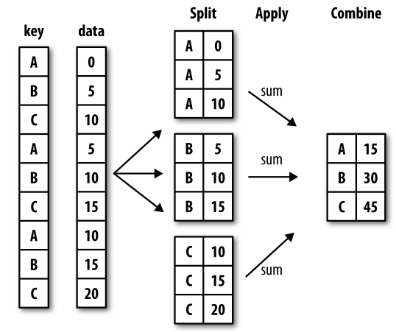

Source: [stackoverflow.com](https://stackoverflow.com/questions/35500425/using-pandas-groupby-just-to-drop-repeated-items)

*Groupby works in much the same way as would a pivot table in Excel, whereas Dissolve applies similar logic but spatially.*

In [31]:
merged_gdf.to_file('lab5_merged_gdf.geojson', driver='GeoJSON')

In [32]:
!pip install contextily

# Producing a final map

6. 📝 (4 points) As the final and likely most time consuming step in this lab, much like the final deliverable in a previous lab, you will produce a static map of economic precarity in Montreal. The difference now is you have many more resources at your disposal, and you understand better how Python graphs work! Using the limited amount of census data you've already collected, produce a map based on the following constraints:

- The code you write to generate the plot must be stored inside a function.
- This function should be as reusable as possible (i.e. aim to have it capable of producing a map no matter what data or column is passed to it).
- The function must be stored inside of an external module.
  - recall that a module is simply a .py file which can be easily created from within Jupyterlab. Like modules and packages that you install with pip, you need to import a module in order to access its objects (variables, functions, etc.). This means that at the top of the code cell where you are generating your map, you will need to `import MODULENAME`. Be sure to import the packages that the module requires inside the module itself.

Your map can be one of two things:
- A choropleth map showing economic precarity **across the island of Montreal**, in which case you will need to present aggregated data.
- A choropleth map showing economic precarity in **one or several neighbouring boroughs within the *city* of Montreal**, in which you present data by dissemination area. Note in this case that you will need to manipulate the bounds/extent of map.


Optional: Consider constructing your map with the help of the following resources:
- [Contextily](https://contextily.readthedocs.io/en/latest/) can allow you to *easily* add a basemap to your figure which can add a lot of geographical context. Note however that you will need to reproject your data before mapping it since contextily requires it to be in Mercator (details are in the docs).
- [Mapclassify](https://github.com/pysal/mapclassify#readme) can segment a series of numbers intuitively, which is great for deriving a set of 3-5 classes when trying to display varying quantities using graduated colours.
- [Geoplot](https://residentmario.github.io/geoplot/) expands on the more basic mapping capabilities of geopandas. For more on this, see the lecture slides.
- Other resources named in the lecture slides!
- In addition, it might be a good idea to bring in other geodata files (such as one for waterways, which could hide administrative boundaries that appear underwater), or streets, but only if you feel this is necessary and doesn't clutter your map!

Finally, consider the components of a map. Not only should you include the components below (though an inset is not always necessary), but you should also indicate you name and the date of the map's creation. Regarding the north arrow, note that it is not always essential to include one if the map is already oriented to the north...

<Projected CRS: EPSG:2950>
Name: NAD83(CSRS) / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

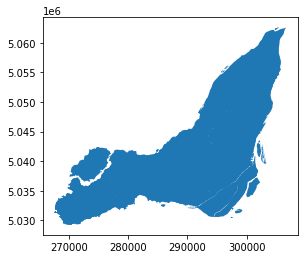

In [33]:
merged_gdf.plot()
merged_gdf.crs

Text(0.03, 0.88, 'N')

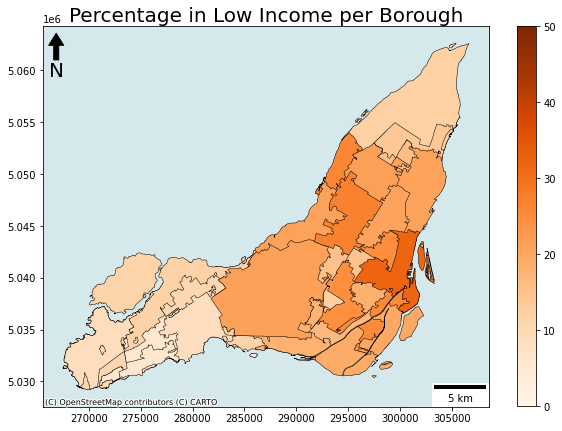

In [49]:
import contextily as cx
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.image as img

ax = merged_gdf.plot(
    'perSum'
    ,figsize=(10,10)
    ,edgecolor="Black"
    ,linewidth=0.5
    ,vmax=50
    ,vmin=0
    ,legend=True
    ,legend_kwds= {'shrink':0.7}
    ,cmap="Oranges"
)

ax.annotate(
    "Percentage in Low Income per Borough",
    (0.5,1)
    ,xycoords = 'axes fraction'
    ,horizontalalignment='center'
    ,verticalalignment='bottom'
    ,fontsize = 20
    ,color='#000'
    ,fontstyle='normal'
)


# Link to add basemap
data_url = "https://ndownloader.figshare.com/files/20232174"
db = gpd.read_file(data_url)

# Adding the basemap
background = db.query("city_id == 'ci122'")
cx.add_basemap(ax,
               crs=background.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
              )



# Adding the scale bar
ax.add_artist(ScaleBar(1, dimension= "si-length", units="m", location= 'lower right'))




# Adding the north arrow
x, y, arrow_length = 0.03, 0.98, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#fig.savefig('lab5Map.png', dpi=300)

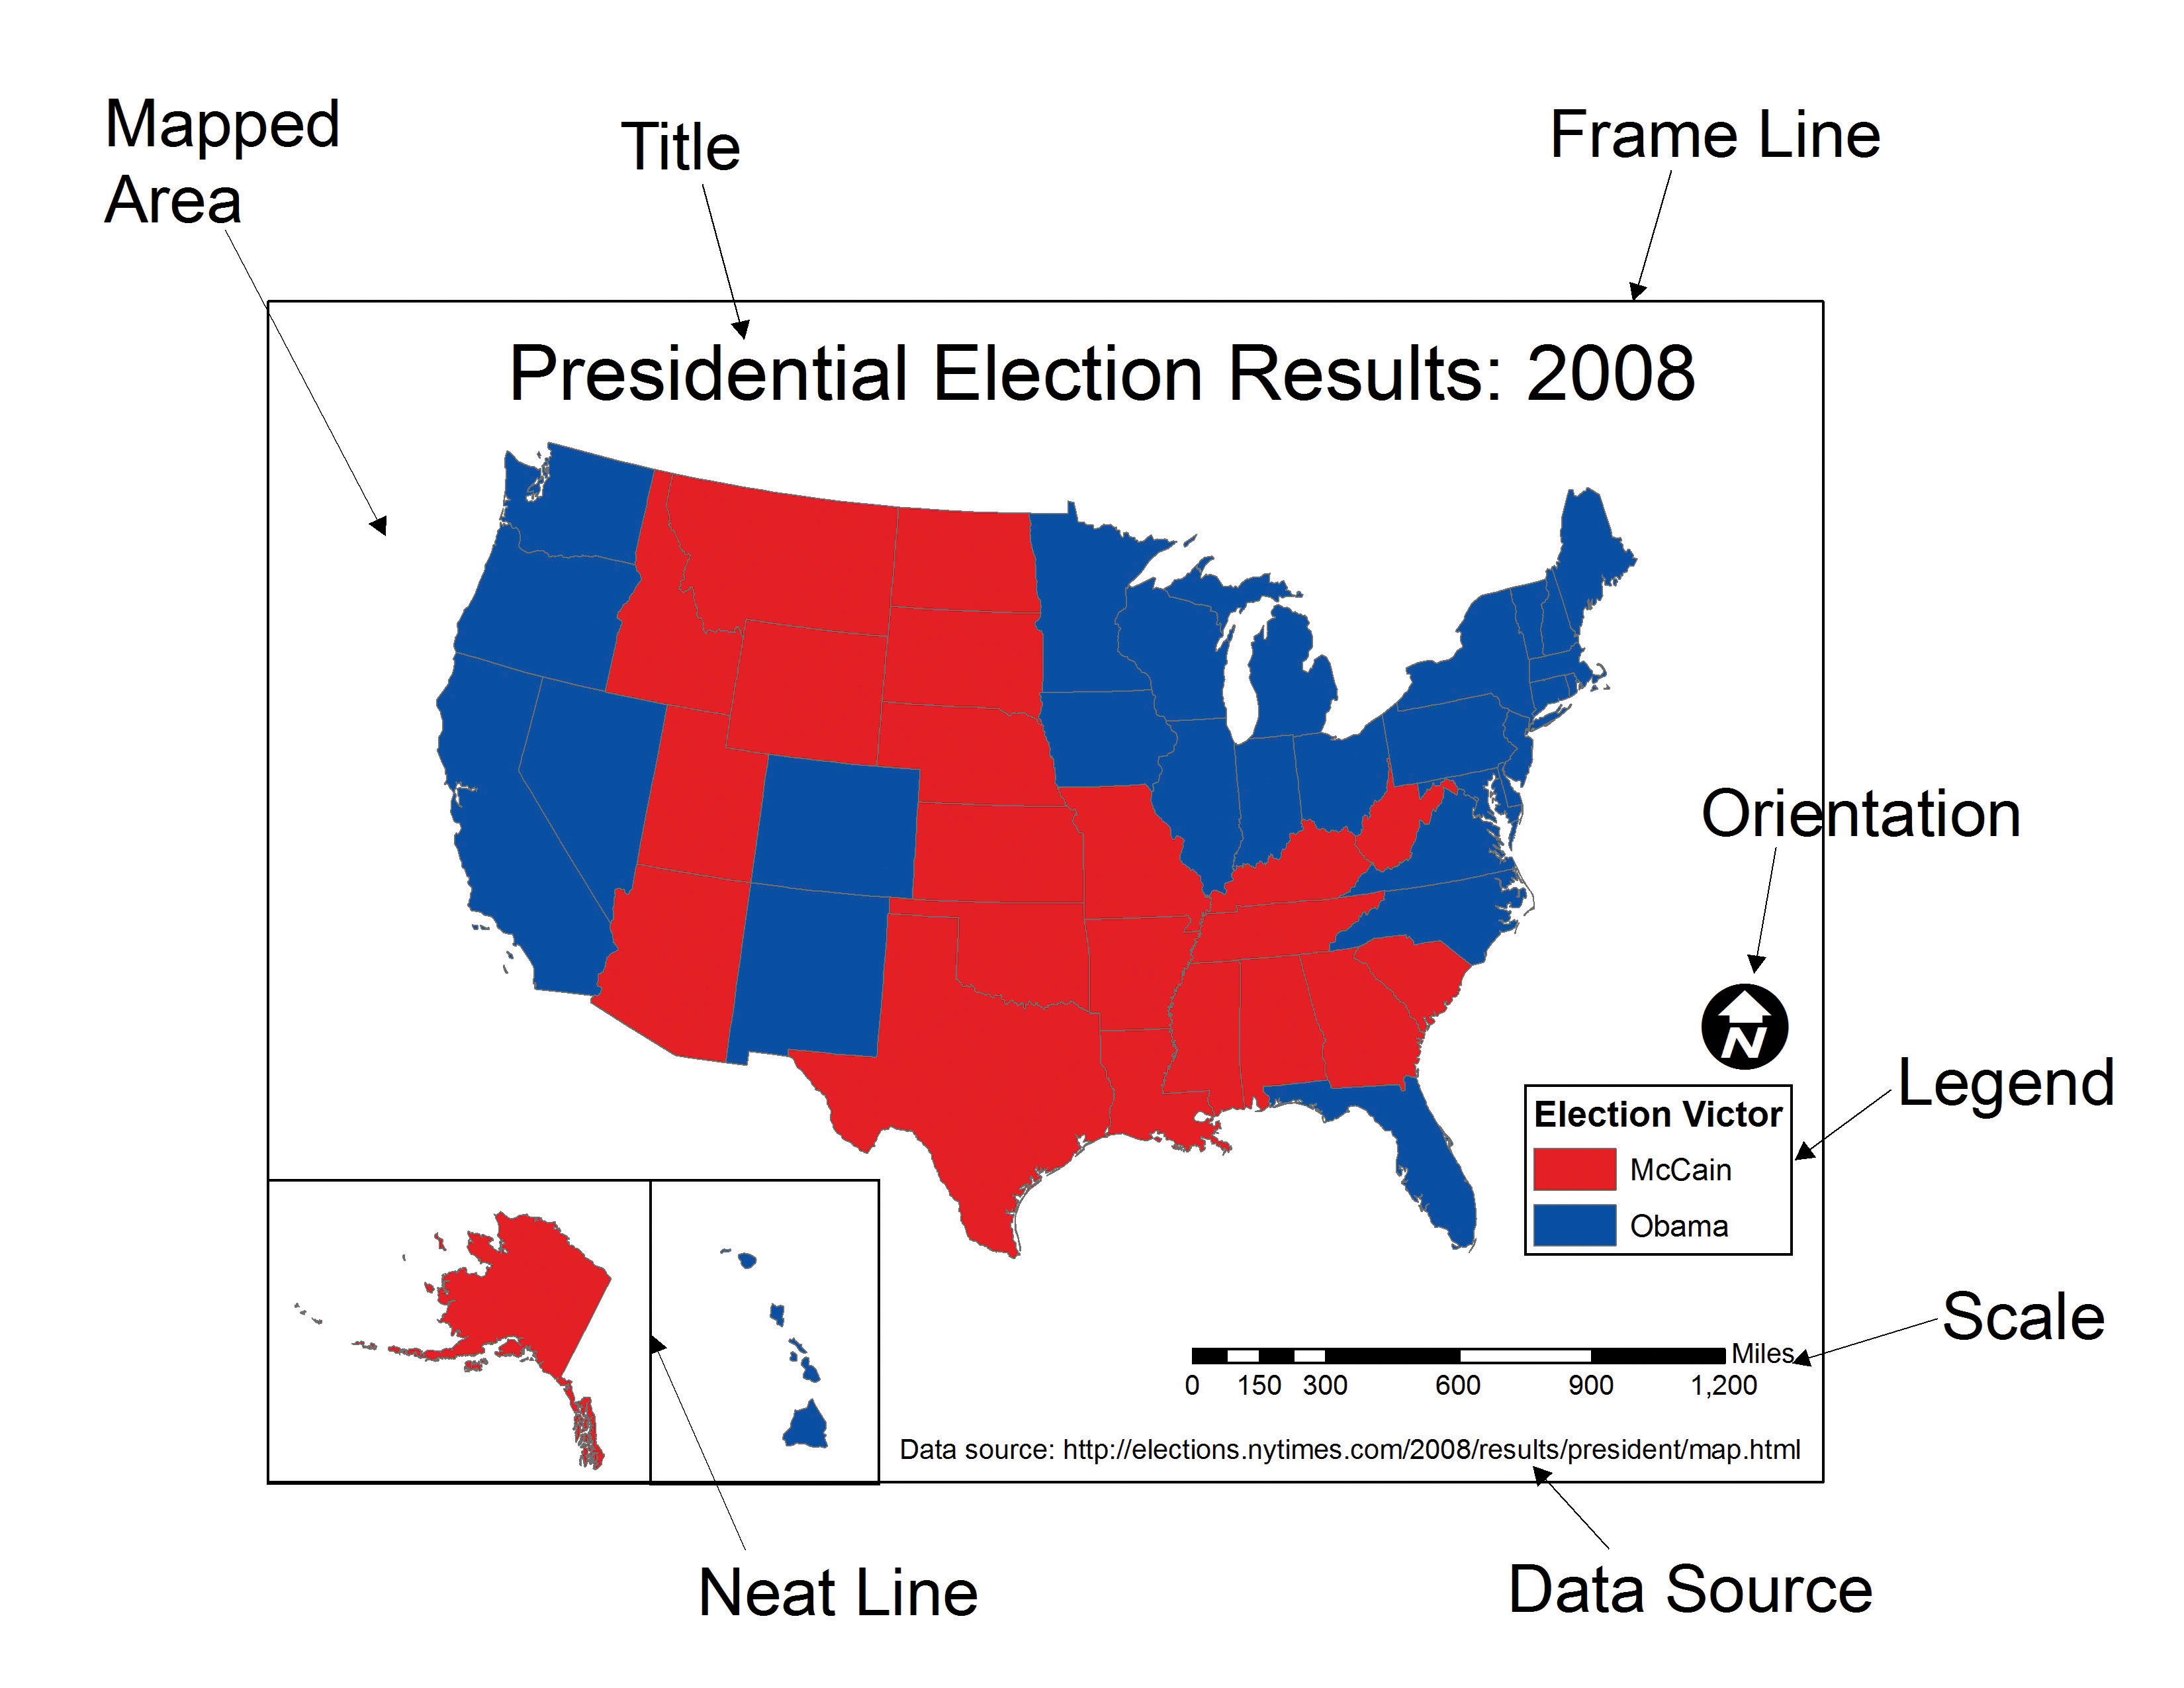
Source: [saylordotorg.github.io](https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/s13-03-cartographic-design.html)


In [37]:
def mapCode(Column, mapColour, edgeColour, mapTitle):
    ax = merged_gdf.plot(
    Column
    ,figsize=(10,10)
    ,edgecolor=edgeColour
    ,linewidth=0.5
    ,vmax=50
    ,vmin=0
    ,legend=True
    ,legend_kwds= {'shrink':0.7}
    ,cmap=mapColour
    )

    ax.annotate(
    mapTitle,
    (0.5,1)
    ,xycoords = 'axes fraction'
    ,horizontalalignment='center'
    ,verticalalignment='bottom'
    ,fontsize = 20
    ,color='#000'
    ,fontstyle='normal'
    )


    # Link to add basemap
    data_url = "https://ndownloader.figshare.com/files/20232174"
    db = gpd.read_file(data_url)

    # Adding the basemap
    background = db.query("city_id == 'ci122'")
    cx.add_basemap(ax,
               crs=background.crs.to_string(),
               source=cx.providers.CartoDB.Voyager
                  )



    # Adding the scale bar
    ax.add_artist(ScaleBar(1, dimension= "si-length", units="m", location= 'lower right'))




    # Adding the north arrow
    x, y, arrow_length = 0.03, 0.98, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

---
When you are done with your map. Export it! An essential figure method to remember is one which allows you to export your work as an image file. The code below exports it as a very high quality png. It might need to be placed in the same code cell as your map generator in order to work.

# Deliverables

- Make sure that all your cells have been run and that their outputs are displayed before submitting.
- Include the map output (.png) in your pushed repo
- Include the map-generating module file (.py) in your pushed repo
- Complete the questions in this notebook